In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects
import numpy as np


In [2]:
!gdown https://drive.google.com/uc?id=1XkPPfZ7yKDwW3DZ94dyJkaRn48CHqcoZ


Downloading...
From: https://drive.google.com/uc?id=1XkPPfZ7yKDwW3DZ94dyJkaRn48CHqcoZ
To: /content/telco.csv
100% 978k/978k [00:00<00:00, 17.6MB/s]


In [3]:
df =pd.read_csv('telco.csv')

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


changed Senior citizen type as object.

In [5]:
df['SeniorCitizen']=df['SeniorCitizen'].astype('object')


In [6]:
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,object
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


from the data we have 3555 male customers and 3488 are females

In [7]:
df['gender'].value_counts()

,count
gender,
Male,3555
Female,3488


In [8]:
df.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.0,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,2.0,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,3186-AJIEK,Male,0.0,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,5901.0,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,NaN,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


half of the customers contract type as month to month

In [9]:
df['Contract'].value_counts()

,count
Contract,
Month-to-month,3875
Two year,1695
One year,1473


In [10]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [11]:
df['Churn'] = df['Churn'].replace({'No':0,'Yes':1})

<ipython-input-11-fcb68043cf73>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Churn'] = df['Churn'].replace({'No':0,'Yes':1})


In [12]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [13]:
df.groupby('Contract')['Churn'].mean()

,Churn
Contract,
Month-to-month,0.427097
One year,0.112695
Two year,0.028319


In [14]:
df.groupby('tenure')['Churn'].mean()

,Churn
tenure,
0,0.000000
1,0.619902
2,0.516807
3,0.470000
4,0.471591
...,...
68,0.090000
69,0.084211
70,0.092437


created the bin for tenure and named as tenure group. from that less than 12 months 2175 customers,more than 2200 customers are having tenure od >4 years

In [15]:
df['tenuregroup']=pd.cut(df['tenure'],[0,12,24,36,48,60,72], labels=['0-12','13-24','25-36','37-48','49-60','61-72'])
df['tenuregroup'].value_counts().sort_index()

,count
tenuregroup,
0-12,2175
13-24,1024
25-36,832
37-48,762
49-60,832
61-72,1407


In [16]:
df.groupby('tenuregroup')['Churn'].mean()

<ipython-input-16-73b09505c1e4>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('tenuregroup')['Churn'].mean()


,Churn
tenuregroup,
0-12,0.476782
13-24,0.287109
25-36,0.216346
37-48,0.190289
49-60,0.144231
61-72,0.066098


details of payment method used by the customers given. Most of the customers churn in who preferred Electronic check method.

In [17]:
df.groupby('PaymentMethod')['Churn'].mean()

,Churn
PaymentMethod,
Bank transfer (automatic),0.167098
Credit card (automatic),0.152431
Electronic check,0.452854
Mailed check,0.191067


derived from the below data that, customers tenure 0-12 months are more churn

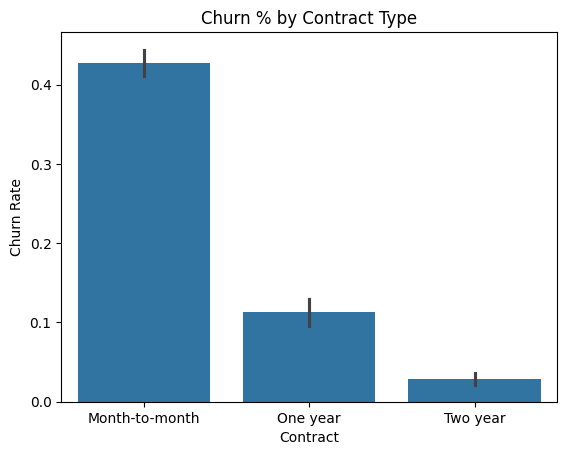

In [18]:
sns.barplot(x='Contract', y='Churn', data=df)
plt.title('Churn % by Contract Type')
plt.ylabel('Churn Rate')
plt.show()

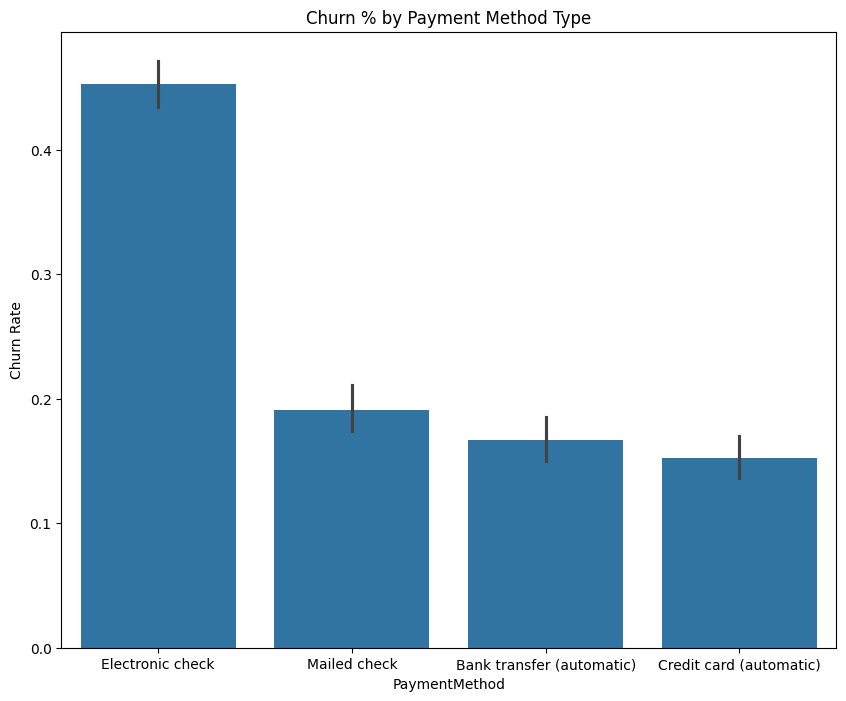

In [19]:
plt.figure(figsize=(10, 8))
sns.barplot(x='PaymentMethod', y='Churn', data=df)

plt.title('Churn % by Payment Method Type')
plt.ylabel('Churn Rate')

plt.show()

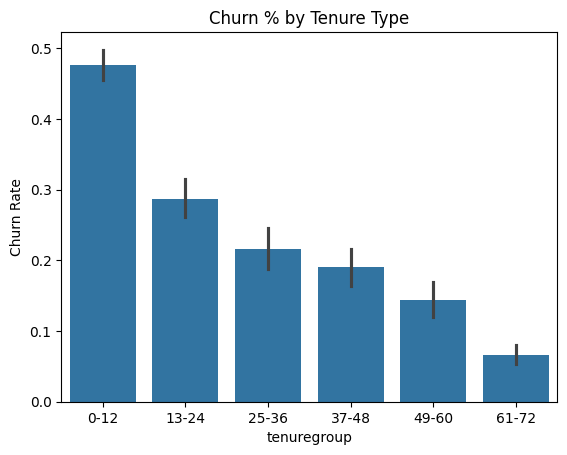

In [20]:
sns.barplot(x='tenuregroup', y='Churn', data=df)
plt.title('Churn % by Tenure Type')
plt.ylabel('Churn Rate')
plt.show()

  Fiber optic users are more Churn than DSL or internet serices

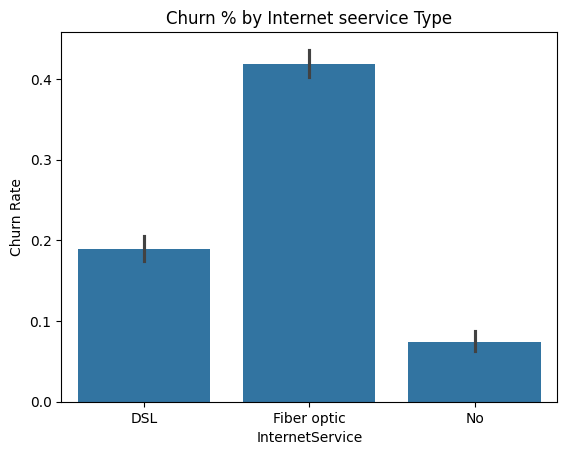

In [21]:
sns.barplot(x='InternetService', y='Churn', data=df)
plt.title('Churn % by Internet seervice Type')
plt.ylabel('Churn Rate')
plt.show()

In [25]:
df['TotalCharges'] = df['TotalCharges'].fillna(0)

converting the strings to numeric values as we are going to use heatmap to identify correlated variables

In [27]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [29]:
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,object
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [30]:
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges','Churn']

In [35]:
corr_matrix = df[numeric_cols].corr()
corr_matrix

,tenure,MonthlyCharges,TotalCharges,Churn
tenure,1.000000,0.247900,0.825880,-0.352229
MonthlyCharges,0.247900,1.000000,0.651065,0.193356
TotalCharges,0.825880,0.651065,1.000000,-0.199484
Churn,-0.352229,0.193356,-0.199484,1.000000


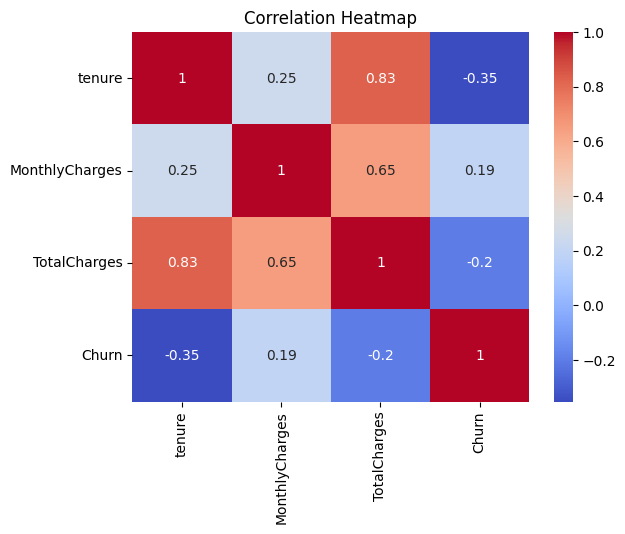

In [46]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


The above anaysis shows the below insights.

Customers on monthly contracts churn the most — often 3–4× higher than those on 1-year or 2-year contracts.

Fiber optic internet users show higher churn than DSL or no-internet users — possibly due to higher bills or service issues.

Electronic check payment users churn more than those paying by bank transfer or credit card.


Recommendation: Target monthly contract customers with loyalty incentives or discounts for upgrading to longer terms.Focus retention efforts on new customers (<1 year), e.g., onboarding support, retention calls, welcome credits.